In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

C:\Users\suubc\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\suubc\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Simple Linear Regression
 * kesişim kat sayısı -5

x
 [4.90247407 1.90014432 6.354348   9.05225434 4.0941706  2.41403535
 3.66519643 6.25925305 9.50900623 1.69536047 8.60049696 0.85997628
 9.61965    5.51057546 3.60191934 0.12933416 8.05568007 1.99891771
 8.18021718 9.06239973 1.23213785 9.18794907 5.70464638 0.4244827
 0.46450647 4.42113923 2.50685086 2.18316751 9.35107231 0.54098478
 3.83195683 0.33799822 8.31965384 3.38903311 1.1180938  2.60689919
 9.97171906 8.14282226 6.92276747 8.5310008  1.23673163 9.10586173
 3.47271037 9.25595709 3.5162347  6.42232984 9.0400962  9.70801882
 3.11832546 2.93576687] 

y
 [ 6.79012621 -1.84918863  6.52753075 12.01697766  4.77227835  0.87115224
  1.34480151  8.29805594 12.88720237 -3.14298334 13.25190347 -2.72800432
 14.65297508  4.51643625  1.86461461 -4.16005612 11.77254091 -1.06500547
 11.86907867 15.65858146 -2.68974704 13.46893938  6.14566697 -5.47467304
 -4.30199842  3.44896118  0.64503578  0.02951393 12.71518725 -3.8309253
  0.38043448 -4.52221287 10.51831151  0.5595803  -2.47905157 -0.51985

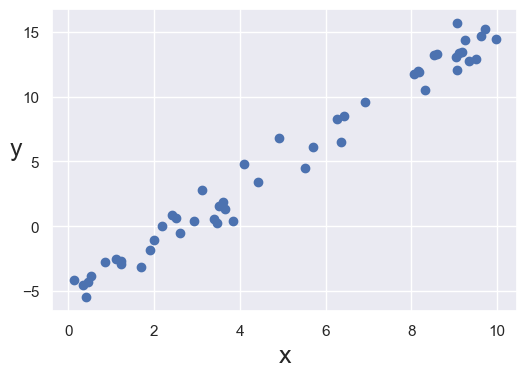

In [4]:
rng = np.random.RandomState()

x = 10 * rng.rand(50)
y = 2 * x -5 + rng.randn(50)

plt.figure(dpi=100)
plt.scatter(x, y)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)

print('x\n', x, "\n")
print('y\n', y, "\n")

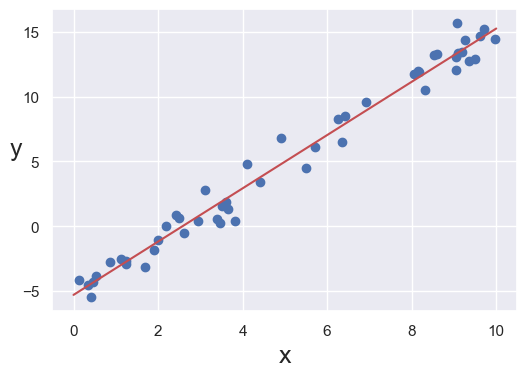

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.figure(dpi=100)
plt.scatter(x, y)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.plot(xfit, yfit, color='r');

* verilerin eğimi ve kesişim modeli fit parametrelerinde bulunur

In [6]:
print('Model eğimi: ', model.coef_[0])
print('Model kesişimi: ', model.intercept_)

Model eğimi:  2.052290974109828
Model kesişimi:  -5.28191150985134


# Polynomial Regression

[[ 2.14869645]
 [ 0.53067932]
 [-1.77047935]
 [ 0.69132063]
 [ 1.19281985]
 [ 2.53770145]
 [ 2.4655952 ]
 [-2.1285261 ]
 [ 1.56586301]
 [ 2.28823642]
 [-2.8139765 ]
 [-1.83340697]
 [ 1.75110398]
 [-1.64970654]
 [ 1.52659926]
 [ 1.58808415]
 [-2.43345247]
 [ 1.42834954]
 [-1.97420486]
 [ 1.87690655]
 [ 2.77854372]
 [-2.3000172 ]
 [-1.48511494]
 [-0.48101411]
 [ 2.54404813]
 [ 0.60592837]
 [-0.30282341]
 [-2.69991185]
 [-2.55381082]
 [ 1.18180041]
 [ 1.72120434]
 [-1.33863843]
 [-0.87179121]
 [-0.5726258 ]
 [-0.47471221]
 [ 0.15787431]
 [-1.74441958]
 [-1.44219232]
 [-2.05786735]
 [ 2.10240747]
 [-1.03456807]
 [-1.14200518]
 [ 2.83885583]
 [ 1.19573178]
 [ 0.50747007]
 [ 1.43173399]
 [ 0.83520278]
 [ 2.48208255]
 [ 2.00965355]
 [ 0.02299976]
 [-2.28664694]
 [-1.50584847]
 [ 2.30140795]
 [-2.75846649]
 [-1.16297827]
 [ 2.43635738]
 [-1.78388558]
 [ 0.00692879]
 [-0.73292277]
 [ 2.16498391]
 [ 1.46196143]
 [ 1.38687816]
 [ 2.40712463]
 [-1.73274951]
 [-1.16302017]
 [-0.14945263]
 [-1.93373

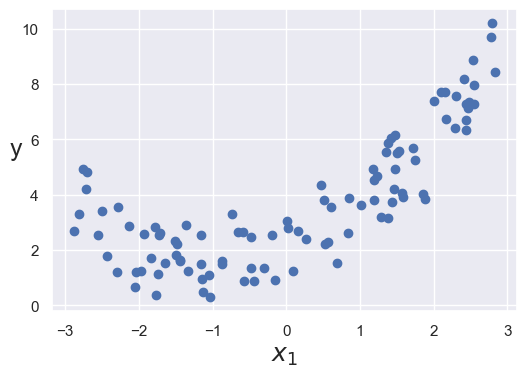

In [7]:
m = 100
X = 6 * np.random.rand(m, 1) -3
print(X)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.figure(dpi=100)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.scatter(X, y)

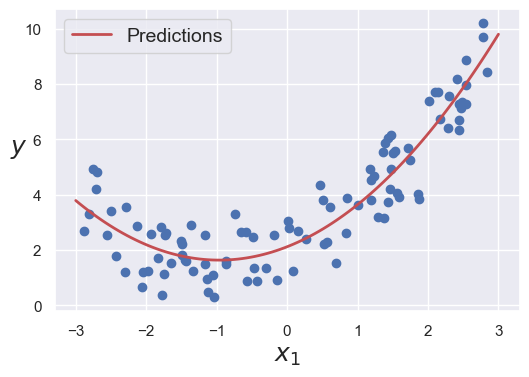

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomia_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])

polynomia_regression.fit(X,y)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_newbig = polynomia_regression.predict(X_new)
plt.figure(dpi=100)
plt.scatter(X, y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X_new, y_newbig, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)

# Logistic Regression

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if iris virginica, else 0

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

[[0.98554411 0.01445589]
 [0.98543168 0.01456832]
 [0.98531838 0.01468162]
 ...
 [0.02618938 0.97381062]
 [0.02598963 0.97401037]
 [0.02579136 0.97420864]]


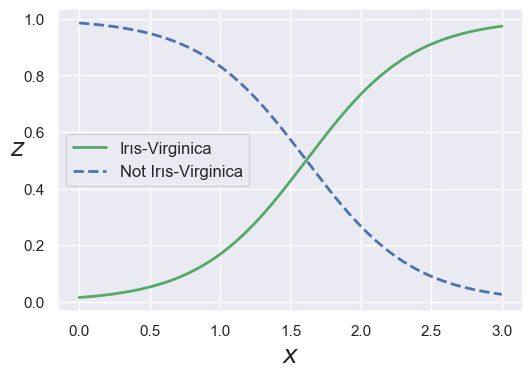

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
print(y_proba)
plt.figure(dpi=100)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Irıs-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Irıs-Virginica")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$z$", rotation=0, fontsize=18)
plt.legend(loc="center left", fontsize=12)

In [12]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

decision_boundary

array([1.61561562])

# k-Nearest Neighbor / KNN

In [13]:
from sklearn import datasets

wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data['target'] = wine['target']

wine_data.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1


In [14]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [17]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7037037037037037


# Support Vector Machines

### Classification

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_data = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                        columns = iris['feature_names'] + ['target'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [23]:
X = iris.data
y = iris.target
print(y)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [26]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_preds = svm_model_linear.predict(X_test)

In [27]:
svm_preds

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [29]:
accuracy = svm_model_linear.score(X_test, y_test)
accuracy

0.9736842105263158

## Regression

In [35]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [38]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X, '\n')
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [39]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [40]:
y_pred = regressor.predict([[6.5]])
y_pred

array([0.01158103])

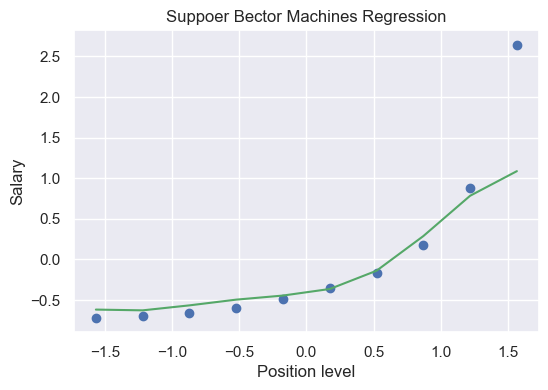

In [41]:
plt.figure(dpi=100)
plt.scatter(X, y, color='b')
plt.plot(X, regressor.predict(X), color='g')
plt.title('Suppoer Bector Machines Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Decision Trees

### Classifiers

In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [43]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv')
pima.columns = col_names
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
featur_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[featur_cols] # Features
y = pima.label # target

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% train 30% test

In [48]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [49]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6796536796536796


# Visualization Trees

In [51]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO
export_graphviz(clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, feature_names=featur_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabets_1.png')
Image(graph.creat_png())

ModuleNotFoundError: No module named 'pydotplus'

In [52]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('acc: ', metrics.accuracy_score(y_test, y_pred))

acc:  0.7705627705627706


In [53]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = feature_cols,class_names=['0','1']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_2.png')
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

# Regressor Decision tree

In [54]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

dataset

array([['Asset Flip', '100', '1000'],
       ['Text Based', '500', '3000'],
       ['Visual Novel', '1500', '5000'],
       ['2D Pixel Art', '3500', '8000'],
       ['2D Vector Art', '5000', '6500'],
       ['Strategy', '6000', '7000'],
       ['First Person Shooter', '8000', '15000'],
       ['Simulator', '9500', '20000'],
       ['Racing', '12000', '21000'],
       ['RPG', '14000', '25000'],
       ['Sandbox', '15500', '27000'],
       ['Open-World', '16500', '30000'],
       ['MMOFPS', '25000', '52000'],
       ['MMORPG', '30000', '80000']], dtype='<U20')

In [55]:
X = dataset[:,1:2].astype(int)
X

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [56]:
y = dataset[:,2].astype(int)
y

array([ 1000,  3000,  5000,  8000,  6500,  7000, 15000, 20000, 21000,
       25000, 27000, 30000, 52000, 80000])

In [57]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [62]:
y_pred = regressor.predict([[3750]])
print('predict price: ', y_pred)
print("predict price:% d\n "% y_pred)

predict price:  [8000.]
predict price: 8000
 


In [63]:
dot_data = StringIO()
export_graphviz(regressor, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = ['Production Cost']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('regression_tree.png')
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

# Ensemble Methods & random forest

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

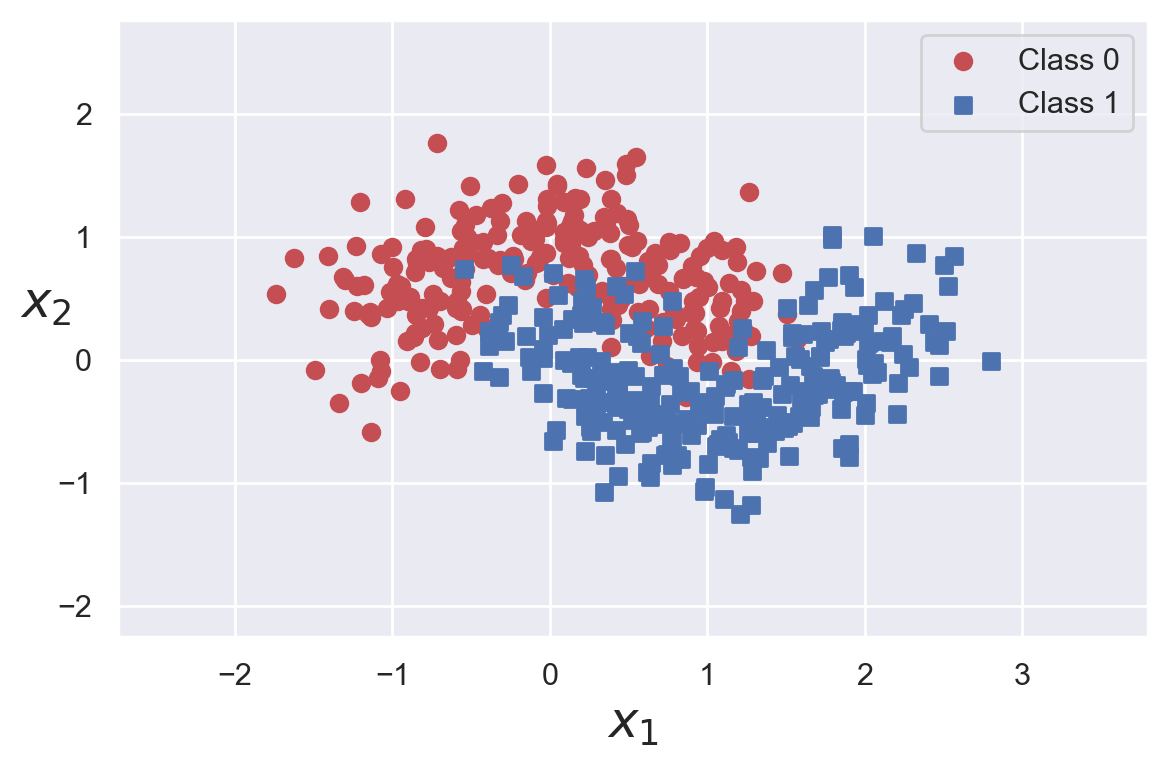

In [65]:
plt.figure(dpi=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')

plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', rotation=0, fontsize=18)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [67]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC

LOG_CLF = LogisticRegression(solver='liblinear', random_state=42)
RND_CLF = RandomForestClassifier(n_estimators=10, random_state=42)
SVM_CLF = SVC(gamma='auto', random_state=42)

VOT_CLF = VotingClassifier(estimators=[('Ir', LOG_CLF), ('rf', RND_CLF), ('svc', SVM_CLF)],voting='hard')

In [68]:
VOT_CLF.fit(X_train, y_train)

VotingClassifier(estimators=[('Ir',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [69]:
from sklearn.metrics import accuracy_score

for clf in (LOG_CLF, RND_CLF, SVM_CLF, VOT_CLF):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


# Bagging and Pasting

In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [71]:

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [72]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


# Random forest

In [74]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [75]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

# Random forest regression

In [76]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns

In [77]:
data_df = pd.read_csv('Random-Forest-Regression-Data.csv')
data_df.head()

,x,y
0,59.000000,152.553428
1,88.696970,158.420441
2,87.443939,154.189316
3,110.090909,161.136969
4,126.787879,158.819572


In [78]:
x = data_df.x.values.reshape(-1, 1)
y = data_df.y.values.reshape(-1, 1)
print('x\n', x, '\n')
print('y\n', y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

x
 [[  59.        ]
 [  88.6969697 ]
 [  87.44393939]
 [ 110.09090909]
 [ 126.78787879]
 [ 148.48484848]
 [ 168.18181818]
 [ 187.87878788]
 [ 207.57575758]
 [ 227.27272727]
 [ 246.96969697]
 [ 266.66666667]
 [ 286.36363636]
 [ 306.06060606]
 [ 325.75757576]
 [ 345.45454545]
 [ 365.15151515]
 [ 384.84848485]
 [ 404.54545455]
 [ 424.24242424]
 [ 443.93939394]
 [ 463.63636364]
 [ 483.33333333]
 [ 503.03030303]
 [ 522.72727273]
 [ 542.42424242]
 [ 562.12121212]
 [ 581.81818182]
 [ 601.51515152]
 [ 621.21212121]
 [ 640.90909091]
 [ 660.60606061]
 [ 680.3030303 ]
 [ 700.        ]
 [ 719.6969697 ]
 [ 739.39393939]
 [ 759.09090909]
 [ 778.78787879]
 [ 798.48484848]
 [ 818.18181818]
 [ 837.87878788]
 [ 857.57575758]
 [ 877.27272727]
 [ 896.96969697]
 [ 916.66666667]
 [ 936.36363636]
 [ 956.06060606]
 [ 975.75757576]
 [ 995.45454545]
 [1015.15151515]
 [1034.84848485]
 [1054.54545455]
 [1074.24242424]
 [1093.93939394]
 [1113.63636364]
 [1133.33333333]
 [1153.03030303]
 [1172.72727273]
 [1192.4242

In [79]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [80]:
y_pred = rf_reg.predict(x_test)
y_pred

array([172.7449161 , 167.9913018 , 172.46776329, 164.9242503 ,
       164.8251143 , 161.32373812, 159.18845812, 170.34509537,
       157.58956966, 156.09250032, 159.50552758, 161.92643651,
       168.59230331, 162.93412487, 175.5955772 , 159.75876224,
       171.42701753, 172.00339063, 156.07536637, 162.70691718,
       166.88824928, 174.83001649, 161.79425531, 164.6032941 ,
       170.86370104, 157.58755349, 164.00827894, 173.61883624,
       157.67295074, 171.5603688 ])

In [81]:
print("Test Accuracy = ", rf_reg.score(x_test, y_test))

Test Accuracy =  0.8794716961415205
